In [6]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [7]:
mydata=pd.read_csv('D://mydata.csv')

In [8]:
mydata

,columns1,columns2,columns3
0,1,a,A
1,2,a,A
2,2,a,A
3,3,b,B
4,4,b,B
5,4,b,B


In [9]:
mydata.duplicated()


0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

In [15]:
mydata.drop_duplicates()


,columns1,columns2,columns3
0,1,a,A
1,2,a,A
3,3,b,B
4,4,b,B


In [16]:
mydata.drop_duplicates(['columns2'])


,columns1,columns2,columns3
0,1,a,A
3,3,b,B


In [17]:
my_source1=pd.read_csv('D://my_source1.csv')
my_source1

,0,1,2,3,4
0,babak,1,13,17,17
1,raha,2,14,14,15
2,sara,3,17,12,20
3,reza,4,12,18,19


In [18]:
my_source2=pd.read_csv('D://my_source2.csv')
my_source2

,0,1,2,3
0,babak,1,13,17
1,baran,2,15,20
2,sara,3,14,19
3,arash,4,20,19
4,mehran,5,15,18
5,reza,6,14,12


In [19]:
my_concat=pd.concat([my_source1,my_source2],axis=0,ignore_index=True)


In [11]:
my_concat

,0,1,2,3,4
0,babak,1,13,17,17.0
1,raha,2,14,14,15.0
2,sara,3,17,12,20.0
3,reza,4,12,18,19.0
4,babak,1,13,17,NaN
5,baran,2,15,20,NaN
6,sara,3,14,19,NaN
7,arash,4,20,19,NaN
8,mehran,5,15,18,NaN
9,reza,6,14,12,NaN


In [12]:
my_concat.drop(['4'],axis=1,inplace=True)
my_concat

,0,1,2,3
0,babak,1,13,17
1,raha,2,14,14
2,sara,3,17,12
3,reza,4,12,18
4,babak,1,13,17
5,baran,2,15,20
6,sara,3,14,19
7,arash,4,20,19
8,mehran,5,15,18
9,reza,6,14,12


In [13]:
my_concat.drop_duplicates(inplace=True)
my_concat

,0,1,2,3
0,babak,1,13,17
1,raha,2,14,14
2,sara,3,17,12
3,reza,4,12,18
5,baran,2,15,20
6,sara,3,14,19
7,arash,4,20,19
8,mehran,5,15,18
9,reza,6,14,12


In [20]:
smartphones=pd.read_csv('D://smartphone.csv')
smartphones

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S10,Android,128,8,163.0,Samsung,6.2
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia 1 ll,Android,256,8,181.0,Sony,6.5
3,iphone13,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy S8,Android,16,2,145.0,Samsung,5.1
6,iphone 11 pro max,ios,256,4,226.0,Apple,6.5
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0


In [15]:
smartphones.describe()


,Capacity,Ram,Weight,inch
count,9.000000,9.000000,9.000000,9.000000
mean,113.777778,4.222222,162.277778,5.544444
std,93.104481,2.279132,27.833333,0.698411
min,16.000000,2.000000,138.000000,4.700000
25%,32.000000,3.000000,144.500000,5.000000
50%,128.000000,4.000000,150.000000,5.200000
75%,128.000000,4.000000,170.000000,6.200000
max,256.000000,8.000000,226.000000,6.500000


In [16]:
smartphones.OS.value_counts()


Android     6
ios         2
windows     1
Name: OS, dtype: int64

In [17]:
smartphones.Company.value_counts()


Samsung      2
Apple        2
Microsoft    1
Sony         1
HTC          1
Motorola     1
Google       1
Name: Company, dtype: int64

In [18]:
smartphones.Capacity.value_counts()


128    3
256    2
16     2
32     1
64     1
Name: Capacity, dtype: int64

In [23]:
smartphones.groupby(smartphones['Company']).mean()

,Capacity,Ram,Weight,inch
Company,,,,
Apple,192.0,3.0,182.0,5.60
Google,128.0,4.0,143.0,5.00
HTC,64.0,4.0,170.0,5.70
Microsoft,32.0,3.0,150.0,5.20
Motorola,16.0,3.0,144.5,5.00
Samsung,72.0,5.0,154.0,5.65
Sony,256.0,8.0,181.0,6.50


In [21]:
pd.crosstab(smartphones.OS,smartphones.Capacity)


Capacity,16,32,64,128,256
OS,,,,,
Android,2,0,1,2,1
ios,0,0,0,1,1
windows,0,1,0,0,0


In [22]:
pd.pivot_table(smartphones,index='Name',columns='Company',values='Ram')


Company,Apple,Google,HTC,Microsoft,Motorola,Samsung,Sony
Name,,,,,,,
Galaxy S10,NaN,NaN,NaN,NaN,NaN,8.0,NaN
Galaxy S8,NaN,NaN,NaN,NaN,NaN,2.0,NaN
Lumia 950,NaN,NaN,NaN,3.0,NaN,NaN,NaN
Moto G5,NaN,NaN,NaN,NaN,3.0,NaN,NaN
Pixel,NaN,4.0,NaN,NaN,NaN,NaN,NaN
U Ultra,NaN,NaN,4.0,NaN,NaN,NaN,NaN
Xpreia 1 ll,NaN,NaN,NaN,NaN,NaN,NaN,8.0
iphone 11 pro max,4.0,NaN,NaN,NaN,NaN,NaN,NaN
iphone13,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
smartphones.rename(index=smartphones.Name,inplace=True)
smartphones

,Name,OS,Capacity,Ram,Weight,Company,inch
Galaxy S10,Galaxy S10,Android,128,8,163.0,Samsung,6.2
Lumia 950,Lumia 950,windows,32,3,150.0,Microsoft,5.2
Xpreia 1 ll,Xpreia 1 ll,Android,256,8,181.0,Sony,6.5
iphone13,iphone13,ios,128,2,138.0,Apple,4.7
U Ultra,U Ultra,Android,64,4,170.0,HTC,5.7
Galaxy S8,Galaxy S8,Android,16,2,145.0,Samsung,5.1
iphone 11 pro max,iphone 11 pro max,ios,256,4,226.0,Apple,6.5
Moto G5,Moto G5,Android,16,3,144.5,Motorola,5.0
Pixel,Pixel,Android,128,4,143.0,Google,5.0


In [24]:
smartphones.drop(['Name','Company'],axis=1,inplace=True)
smartphones

,OS,Capacity,Ram,Weight,inch
Galaxy S10,Android,128,8,163.0,6.2
Lumia 950,windows,32,3,150.0,5.2
Xpreia 1 ll,Android,256,8,181.0,6.5
iphone13,ios,128,2,138.0,4.7
U Ultra,Android,64,4,170.0,5.7
Galaxy S8,Android,16,2,145.0,5.1
iphone 11 pro max,ios,256,4,226.0,6.5
Moto G5,Android,16,3,144.5,5.0
Pixel,Android,128,4,143.0,5.0


In [25]:
smartphones_data=pd.get_dummies(smartphones)
smartphones_data


,Capacity,Ram,Weight,inch,OS_Android,OS_ios,OS_windows
Galaxy S10,128,8,163.0,6.2,1,0,0
Lumia 950,32,3,150.0,5.2,0,0,1
Xpreia 1 ll,256,8,181.0,6.5,1,0,0
iphone13,128,2,138.0,4.7,0,1,0
U Ultra,64,4,170.0,5.7,1,0,0
Galaxy S8,16,2,145.0,5.1,1,0,0
iphone 11 pro max,256,4,226.0,6.5,0,1,0
Moto G5,16,3,144.5,5.0,1,0,0
Pixel,128,4,143.0,5.0,1,0,0


In [26]:
smartphones_data.describe()


,Capacity,Ram,Weight,inch,OS_Android,OS_ios,OS_windows
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,113.777778,4.222222,162.277778,5.544444,0.666667,0.222222,0.111111
std,93.104481,2.279132,27.833333,0.698411,0.500000,0.440959,0.333333
min,16.000000,2.000000,138.000000,4.700000,0.000000,0.000000,0.000000
25%,32.000000,3.000000,144.500000,5.000000,0.000000,0.000000,0.000000
50%,128.000000,4.000000,150.000000,5.200000,1.000000,0.000000,0.000000
75%,128.000000,4.000000,170.000000,6.200000,1.000000,0.000000,0.000000
max,256.000000,8.000000,226.000000,6.500000,1.000000,1.000000,1.000000


In [27]:
from sklearn.preprocessing import scale , normalize, minmax_scale


In [28]:
scale_data=scale(smartphones_data)


In [29]:
scale_data


array([[ 0.16202168,  1.75809815,  0.02752212,  0.99557678,  0.70710678,
        -0.53452248, -0.35355339],
       [-0.93162467, -0.56879646, -0.46787604, -0.52309966, -1.41421356,
        -0.53452248,  2.82842712],
       [ 1.62021682,  1.75809815,  0.71345804,  1.45117971,  0.70710678,
        -0.53452248, -0.35355339],
       [ 0.16202168, -1.03417538, -0.92516666, -1.28243788, -1.41421356,
         1.87082869, -0.35355339],
       [-0.56707589, -0.10341754,  0.29427498,  0.23623856,  0.70710678,
        -0.53452248, -0.35355339],
       [-1.11389906, -1.03417538, -0.6584138 , -0.67496731,  0.70710678,
        -0.53452248, -0.35355339],
       [ 1.62021682, -0.10341754,  2.42829784,  1.45117971, -1.41421356,
         1.87082869, -0.35355339],
       [-1.11389906, -0.56879646, -0.67746757, -0.82683495,  0.70710678,
        -0.53452248, -0.35355339],
       [ 0.16202168, -0.10341754, -0.7346289 , -0.82683495,  0.70710678,
        -0.53452248, -0.35355339]])

In [30]:
df_smartphones=pd.DataFrame(scale_data,index=smartphones_data.index,columns=smartphones_data.columns)

df_smartphones


,Capacity,Ram,Weight,inch,OS_Android,OS_ios,OS_windows
Galaxy S10,0.162022,1.758098,0.027522,0.995577,0.707107,-0.534522,-0.353553
Lumia 950,-0.931625,-0.568796,-0.467876,-0.523100,-1.414214,-0.534522,2.828427
Xpreia 1 ll,1.620217,1.758098,0.713458,1.451180,0.707107,-0.534522,-0.353553
iphone13,0.162022,-1.034175,-0.925167,-1.282438,-1.414214,1.870829,-0.353553
U Ultra,-0.567076,-0.103418,0.294275,0.236239,0.707107,-0.534522,-0.353553
Galaxy S8,-1.113899,-1.034175,-0.658414,-0.674967,0.707107,-0.534522,-0.353553
iphone 11 pro max,1.620217,-0.103418,2.428298,1.451180,-1.414214,1.870829,-0.353553
Moto G5,-1.113899,-0.568796,-0.677468,-0.826835,0.707107,-0.534522,-0.353553
Pixel,0.162022,-0.103418,-0.734629,-0.826835,0.707107,-0.534522,-0.353553


In [31]:
norm_data=normalize(smartphones_data,norm='l1',axis=0)
norm_data

array([[0.125     , 0.21052632, 0.11160561, 0.1242485 , 0.16666667,
        0.        , 0.        ],
       [0.03125   , 0.07894737, 0.10270455, 0.10420842, 0.        ,
        0.        , 1.        ],
       [0.25      , 0.21052632, 0.12393016, 0.13026052, 0.16666667,
        0.        , 0.        ],
       [0.125     , 0.05263158, 0.09448819, 0.09418838, 0.        ,
        0.5       , 0.        ],
       [0.0625    , 0.10526316, 0.11639849, 0.11422846, 0.16666667,
        0.        , 0.        ],
       [0.015625  , 0.05263158, 0.09928107, 0.10220441, 0.16666667,
        0.        , 0.        ],
       [0.25      , 0.10526316, 0.15474153, 0.13026052, 0.        ,
        0.5       , 0.        ],
       [0.015625  , 0.07894737, 0.09893872, 0.1002004 , 0.16666667,
        0.        , 0.        ],
       [0.125     , 0.10526316, 0.09791167, 0.1002004 , 0.16666667,
        0.        , 0.        ]])

In [32]:
df_smartphones=pd.DataFrame(norm_data,index=smartphones_data.index,columns=smartphones_data.columns)
df_smartphones

,Capacity,Ram,Weight,inch,OS_Android,OS_ios,OS_windows
Galaxy S10,0.125000,0.210526,0.111606,0.124248,0.166667,0.0,0.0
Lumia 950,0.031250,0.078947,0.102705,0.104208,0.000000,0.0,1.0
Xpreia 1 ll,0.250000,0.210526,0.123930,0.130261,0.166667,0.0,0.0
iphone13,0.125000,0.052632,0.094488,0.094188,0.000000,0.5,0.0
U Ultra,0.062500,0.105263,0.116398,0.114228,0.166667,0.0,0.0
Galaxy S8,0.015625,0.052632,0.099281,0.102204,0.166667,0.0,0.0
iphone 11 pro max,0.250000,0.105263,0.154742,0.130261,0.000000,0.5,0.0
Moto G5,0.015625,0.078947,0.098939,0.100200,0.166667,0.0,0.0
Pixel,0.125000,0.105263,0.097912,0.100200,0.166667,0.0,0.0


In [33]:
norm_data=normalize(smartphones_data,norm='l2',axis=0)
norm_data

array([[0.29690785, 0.56287804, 0.33052326, 0.37014431, 0.40824829,
        0.        , 0.        ],
       [0.07422696, 0.21107926, 0.30416251, 0.31044361, 0.        ,
        0.        , 1.        ],
       [0.5938157 , 0.56287804, 0.36702276, 0.38805451, 0.40824829,
        0.        , 0.        ],
       [0.29690785, 0.14071951, 0.27982951, 0.28059326, 0.        ,
        0.70710678, 0.        ],
       [0.14845392, 0.28143902, 0.34471751, 0.34029396, 0.40824829,
        0.        , 0.        ],
       [0.03711348, 0.14071951, 0.29402376, 0.30447354, 0.40824829,
        0.        , 0.        ],
       [0.5938157 , 0.28143902, 0.45827151, 0.38805451, 0.        ,
        0.70710678, 0.        ],
       [0.03711348, 0.21107926, 0.29300988, 0.29850347, 0.40824829,
        0.        , 0.        ],
       [0.29690785, 0.28143902, 0.28996826, 0.29850347, 0.40824829,
        0.        , 0.        ]])

In [34]:
df_smartphones=pd.DataFrame(norm_data,index=smartphones_data.index,columns=smartphones_data.columns)
df_smartphones

,Capacity,Ram,Weight,inch,OS_Android,OS_ios,OS_windows
Galaxy S10,0.296908,0.562878,0.330523,0.370144,0.408248,0.000000,0.0
Lumia 950,0.074227,0.211079,0.304163,0.310444,0.000000,0.000000,1.0
Xpreia 1 ll,0.593816,0.562878,0.367023,0.388055,0.408248,0.000000,0.0
iphone13,0.296908,0.140720,0.279830,0.280593,0.000000,0.707107,0.0
U Ultra,0.148454,0.281439,0.344718,0.340294,0.408248,0.000000,0.0
Galaxy S8,0.037113,0.140720,0.294024,0.304474,0.408248,0.000000,0.0
iphone 11 pro max,0.593816,0.281439,0.458272,0.388055,0.000000,0.707107,0.0
Moto G5,0.037113,0.211079,0.293010,0.298503,0.408248,0.000000,0.0
Pixel,0.296908,0.281439,0.289968,0.298503,0.408248,0.000000,0.0


In [35]:
minmax_df=minmax_scale(smartphones_data,feature_range=(-1,1))

In [36]:
df_smartphones=pd.DataFrame(minmax_df,index=smartphones_data.index,columns=smartphones_data.columns)
df_smartphones

,Capacity,Ram,Weight,inch,OS_Android,OS_ios,OS_windows
Galaxy S10,-0.066667,1.000000,-0.431818,0.666667,1.0,-1.0,-1.0
Lumia 950,-0.866667,-0.666667,-0.727273,-0.444444,-1.0,-1.0,1.0
Xpreia 1 ll,1.000000,1.000000,-0.022727,1.000000,1.0,-1.0,-1.0
iphone13,-0.066667,-1.000000,-1.000000,-1.000000,-1.0,1.0,-1.0
U Ultra,-0.600000,-0.333333,-0.272727,0.111111,1.0,-1.0,-1.0
Galaxy S8,-1.000000,-1.000000,-0.840909,-0.555556,1.0,-1.0,-1.0
iphone 11 pro max,1.000000,-0.333333,1.000000,1.000000,-1.0,1.0,-1.0
Moto G5,-1.000000,-0.666667,-0.852273,-0.666667,1.0,-1.0,-1.0
Pixel,-0.066667,-0.333333,-0.886364,-0.666667,1.0,-1.0,-1.0


In [37]:
df=pd.DataFrame(np.array([1,2,3,4,10,27]))


In [38]:
df.quantile(0.75)


0    8.5
Name: 0.75, dtype: float64

In [39]:
import matplotlib.pyplot as plt


<AxesSubplot:>

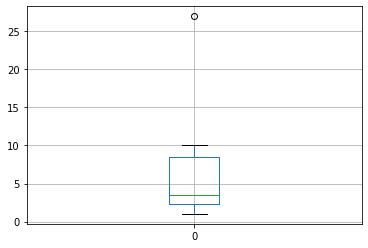

In [40]:
df.boxplot()
